# Exploratory Data Analysis - Marketing Campaigns Analysis

In this notebook we will explore how to perform **Non Visual** as well as **Visual Analysis** on the Marketing Dataset. 

## Getting Started

**About the Use Case**  
Consider a well-established company operating in the retail food sector. Presently they have around several hundred thousands of registered customers and serve almost one million consumers a year. They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially prepared fish and sweet products. These can further be divided into gold and regular products. The customers can order and acquire products through 3 sales channels: physical stores, catalogs and the company's website. Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not promising... For this reason, several strategic initiatives are being considered to reverse this situation. One is to improve the performance of marketing activities, with a special focus on marketing campaigns.


**The Marketing Department**  
The marketing department was pressured to spend its annual budget more wisely. The CMO perceives the importance of having a more quantitative approach when making decisions, the reason why a small team of data scientists was hired with a clear objective in mind: to build a predictive model which will support direct marketing initiatives. Desirably, the success of these activities will prove the value of the approach and convince the more skeptical within the company.

**The Objective**  
The objective of the team is to build a predictive model that will produce the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at selling a new gadget to the Customer Database. 

To build the model, a pilot campaign involving 2240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled. The total cost of the sample campaign was 6720MU and the revenue generated by the customers who accepted the offer was 3674MU. Globally the campaign had a profit of -3046MU. The success rate of the campaign was 15%. 

The objective of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base. Hopefully the model will allow the company to cherry pick the customers that are most likely to purchase the offer while leaving out the non-respondents, making the next campaign highly profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in understanding to study the characteristic features of those customers who are willing to buy the gadget.


**Objectives**   

Key Objectives are: 
1. Explore the data – be creative and pay attention to the details. You need to provide the marketing team a better understanding of the characteristic features of respondents; 
2. Propose and describe a customer segmentation based on customers behaviors; 
3. Create a predictive model which allows the company to maximize the profit of the next marketing campaign.
4. Whatever else you think is necessary.

**The Data Dictionary**  
The data set contains socio-demographic and firmographic features about 2240 customers who were contacted. Additionally, it contains a flag for those customers who responded to the campaign, by buying the product.
<img height="400" width="400" src="data/marketing_data_dictionary.png">


**Are you getting confused from the above problem statement? 🤯😰**

Don’t worry. I have compiled the major takeaways in a more informative and easily to understand manner. Kindly go through the following carefully.

<a href="https://docs.google.com/document/d/1ufcHX6SNkk6e9J2i15tUH3CINxGK5VjwsSLILRxPcUM/edit?usp=sharing">Click here</a> to get the Domain Knowledge Documentation.


In [2]:
import numpy as np
import pandas as pd

In [3]:
PATH = "data/marketing_data.csv"

df = pd.read_csv(PATH)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.shape

(2240, 28)

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

### Renaming the Columns

In [6]:
df.columns = df.columns.str.strip()

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

### Fixing the Data Types of Columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [8]:
df['Income'] = df['Income'].str.strip().str.replace('$', '', regex=False).str.replace(',', '', regex=False)

df['Income'] = df['Income'].astype('float')

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

C:\Users\DELL\AppData\Local\Temp\ipykernel_18936\2795487963.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


## **Missing Values**

1. **Missing Completely at Random:** Missingness is unrelated to any variables in the dataset. You can treat MCAR missing values by simply removing the rows with missing values or imputing them with statistical measures such as mean, median, or mode.


2. **Missing at Random:** Relationship between Missingness and variables but not on the missing values themselves. For eg: Men are more likely to disclose their weight and age than women. Here Weight and Age are MAR on Gender variable. Biasness wil be more if we simply drop the missing values.


3. **Missing Not at Random:** Missingness depends on unobserved variables, you may need more complex imputation methods or modeling techniques to handle MNAR. Biasness wil be more if we simply drop the missing values.


**Important Note: Consult with subject matter experts to gain insights into the reasons for missingness and assess potential relationships with other variables. You can also implement statistical tests like chi-square test and correlation test to identify these relationships.**

In [10]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [11]:
### For MCAR

# Remove rows with missing values
df_dropna = df.dropna()

df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [12]:
### For MCAR

# Impute missing values with mean/median
df_median_imputed = df.fillna(df.median())

df_median_imputed.describe()

TypeError: Cannot convert [['Graduation' 'Graduation' 'Graduation' ... 'Graduation' 'Graduation'
  'PhD']
 ['Divorced' 'Single' 'Married' ... 'Divorced' 'Married' 'Married']] to numeric

In [13]:
numerical_features = list(df.select_dtypes(include=['number']).columns)
categorical_features = list(df.select_dtypes(include=['object']).columns)

numerical_features.remove('ID')

num_discrete_features = ['Year_Birth', 'Kidhome', 'Teenhome',
                        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                        'Response', 'Complain']

numerical_features = [feature for feature in numerical_features if feature not in num_discrete_features]

print(numerical_features)

['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [14]:
### For MCAR

# Impute missing values with mean/median
df_median_imputed = df[numerical_features].fillna(df[numerical_features].median())

df_median_imputed.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,25037.955891,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [15]:
### For MCAR - Using sklearn SimpleImputer
### Univariate imputer for completing missing values with simple strategies.

from sklearn.impute import SimpleImputer

# Impute missing values with mean, median, or mode based on observed variables
imputer = SimpleImputer(strategy='mean')  # Can also use 'median' or 'most_frequent'

df_mean_imputed = pd.DataFrame(imputer.fit_transform(df[numerical_features]),
                               columns=df[numerical_features].columns)

df_mean_imputed.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,25037.797168,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [16]:
### For MAR or MNAR
### A more sophesticated multivariate approach

from sklearn.impute import KNNImputer

# Preprocessing
cat_encoded_df = pd.get_dummies(df[categorical_features])

combined_df = pd.concat([df[numerical_features], df[num_discrete_features], cat_encoded_df], axis=1)

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors = 3)

df_knn_imp = pd.DataFrame(knn_imputer.fit_transform(combined_df),
                         columns=combined_df.columns,
                         index=combined_df.index)

df_knn_imp.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Kidhome,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52229.343452,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,1968.805804,0.444196,...,0.034375,0.000893,0.071429,0.119643,0.053571,0.066071,0.001339,0.150446,0.488839,0.048661
std,25113.745615,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,11.984069,0.538398,...,0.182231,0.029874,0.257597,0.324616,0.225220,0.248462,0.036580,0.357588,0.499987,0.215206
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1893.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35349.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1959.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51371.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,1970.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68468.250000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1977.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,1996.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Steps Involved in Exploratory Data Analysis

1. **Univariate Analysis**  
  A. Discrete Data (i.e. Categorical or Numerical Discrete Columns)
    - Statistical Non Visual Analysis
		- Purpose: Helps us describe and summarize the data
		- count, nunique, unique, value_counts
	- Visual Analysis
		- Purpose: Helps us understand how the data is distributed and Outliers
		- Bar/Count Plot   

  B. Continuous Numerical Data (i.e. Real Numerical)
    - Statistical Non Visual Analysis
		- Purpose: Helps us describe and summarize the data
		- min, max, sum, mean, median, var, std, range, iqr
	- Visual Analysis
		- Purpose: Helps us understand the Distribution of data and Outliers
		- Histogram Plot, KDE Plot and Box Plot

2. **Bivariate Analysis (Purpose - Helps identify the relationships)**  
  A. Continuous Numerical vs Continuous Numerical Data
    - Statistical Non Visual Analysis
		- Purpose: Is there any relationship between two variables - Linear or non Linear relationship?
		- Pearson Correlation Coefficient
	- Visual Analysis
		- Scatter Plot

  B. Continuous Numerical vs Discrete Data
    - Statistical Non Visual Analysis
		- Purpose: How many discrete groups are there and Are the individuals in the groups independent or dependent?
		- Compare the Mean, Median, Std of the groups
	- Visual Analysis
		- Box Plots and Histogram Plots

  C. Discrete vs Discrete Data
    - Statistical Non Visual Analysis
		- Purpose: Are the individuals in the groups independent or dependent?
		- Cross Tabs (i.e. Frequency Tables)
	- Visual Analysis
		- Stacked Bar Plot, Unstacked Bar Plot

### 1. Univariate Analysis - Statistical Non Visual Analysis

In [9]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [10]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [11]:
discrete_univariate_analysis(discrete_df)

********** Education **********
count                                            2240
nunique                                             5
unique     [Graduation, PhD, 2n Cycle, Master, Basic]
Name: Education, dtype: object
Value Counts: 
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

********** Marital_Status **********
count                                                   2240
nunique                                                    8
unique     [Divorced, Single, Married, Together, Widow, Y...
Name: Marital_Status, dtype: object
Value Counts: 
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

********** Country **********
count                                     2240
nunique                                      8
unique     [SP, CA, US, AUS, GER, IND, SA, ME]
Name: Country, dtype: obje

In [12]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [13]:
numerical_univariate_analysis(numerical_df)

********** ID **********
min           0.000000
max       11191.000000
mean       5592.159821
median     5458.500000
std        3246.662198
Name: ID, dtype: float64

********** Year_Birth **********
min       1893.000000
max       1996.000000
mean      1968.805804
median    1970.000000
std         11.984069
Name: Year_Birth, dtype: float64

********** Income **********
min         1730.000000
max       666666.000000
mean       52247.251354
median     51381.500000
std        25173.076661
Name: Income, dtype: float64

********** Kidhome **********
min       0.000000
max       2.000000
mean      0.444196
median    0.000000
std       0.538398
Name: Kidhome, dtype: float64

********** Teenhome **********
min       0.000000
max       2.000000
mean      0.506250
median    0.000000
std       0.544538
Name: Teenhome, dtype: float64

********** Recency **********
min        0.000000
max       99.000000
mean      49.109375
median    49.000000
std       28.962453
Name: Recency, dtype: float64

***

In [14]:
numerical_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')

In [15]:
discrete_num_cols = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                   'Response', 'Complain']
numerical_df.drop(columns=discrete_num_cols, axis=1, inplace=True)

print('Shape:', numerical_df.shape)
print('Columns:', numerical_df.columns)

Shape: (2240, 8)
Columns: Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
      dtype='object')


In [16]:
discrete_num_df = df[discrete_num_cols]

print('Shape:', discrete_num_df.shape)
print('Columns:', discrete_num_df.columns)

Shape: (2240, 16)
Columns: Index(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')


In [17]:
discrete_num_df = discrete_num_df.drop(columns=['ID'], axis=1)

print('Shape:', discrete_num_df.shape)
print('Columns:', list(discrete_num_df.columns))

Shape: (2240, 15)
Columns: ['Year_Birth', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']


In [18]:
numerical_univariate_analysis(numerical_df)

********** Income **********
min         1730.000000
max       666666.000000
mean       52247.251354
median     51381.500000
std        25173.076661
Name: Income, dtype: float64

********** Recency **********
min        0.000000
max       99.000000
mean      49.109375
median    49.000000
std       28.962453
Name: Recency, dtype: float64

********** MntWines **********
min          0.000000
max       1493.000000
mean       303.935714
median     173.500000
std        336.597393
Name: MntWines, dtype: float64

********** MntFruits **********
min         0.000000
max       199.000000
mean       26.302232
median      8.000000
std        39.773434
Name: MntFruits, dtype: float64

********** MntMeatProducts **********
min          0.000000
max       1725.000000
mean       166.950000
median      67.000000
std        225.715373
Name: MntMeatProducts, dtype: float64

********** MntFishProducts **********
min         0.000000
max       259.000000
mean       37.525446
median     12.000000
std     

In [19]:
discrete_univariate_analysis(discrete_df)

********** Education **********
count                                            2240
nunique                                             5
unique     [Graduation, PhD, 2n Cycle, Master, Basic]
Name: Education, dtype: object
Value Counts: 
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

********** Marital_Status **********
count                                                   2240
nunique                                                    8
unique     [Divorced, Single, Married, Together, Widow, Y...
Name: Marital_Status, dtype: object
Value Counts: 
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

********** Country **********
count                                     2240
nunique                                      8
unique     [SP, CA, US, AUS, GER, IND, SA, ME]
Name: Country, dtype: obje

In [20]:
discrete_univariate_analysis(discrete_num_df)

********** Year_Birth **********
count                                                   2240
nunique                                                   59
unique     [1970, 1961, 1958, 1967, 1989, 1954, 1947, 197...
Name: Year_Birth, dtype: object
Value Counts: 
 1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1952    52
1977    52
1959    51
1968    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     7
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: Year_Birth, dtype: int64

********** Kidhome **********
count           2240
nuni

In [21]:
df[discrete_num_cols] = df[discrete_num_cols].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   object        
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   object        
 6   Teenhome             2240 non-null   object        
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### 2. Univariate - Visual Analysis

In [22]:
df.shape

(2240, 28)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

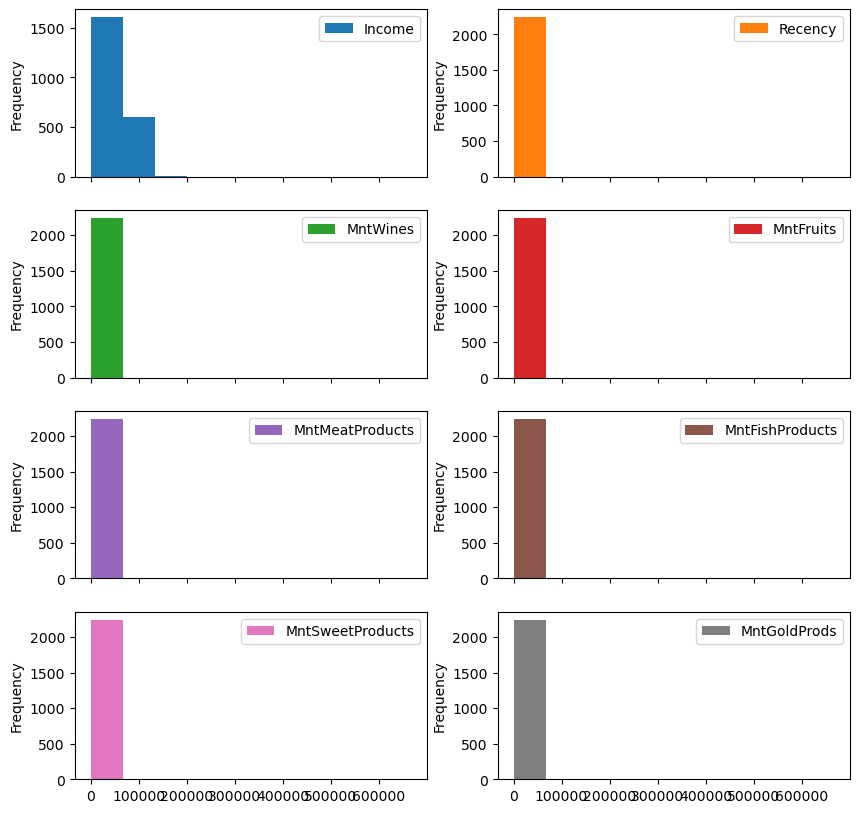

In [23]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

Income                 AxesSubplot(0.125,0.712609;0.352273x0.167391)
Recency             AxesSubplot(0.547727,0.712609;0.352273x0.167391)
MntWines               AxesSubplot(0.125,0.511739;0.352273x0.167391)
MntFruits           AxesSubplot(0.547727,0.511739;0.352273x0.167391)
MntMeatProducts         AxesSubplot(0.125,0.31087;0.352273x0.167391)
MntFishProducts      AxesSubplot(0.547727,0.31087;0.352273x0.167391)
MntSweetProducts           AxesSubplot(0.125,0.11;0.352273x0.167391)
MntGoldProds            AxesSubplot(0.547727,0.11;0.352273x0.167391)
dtype: object

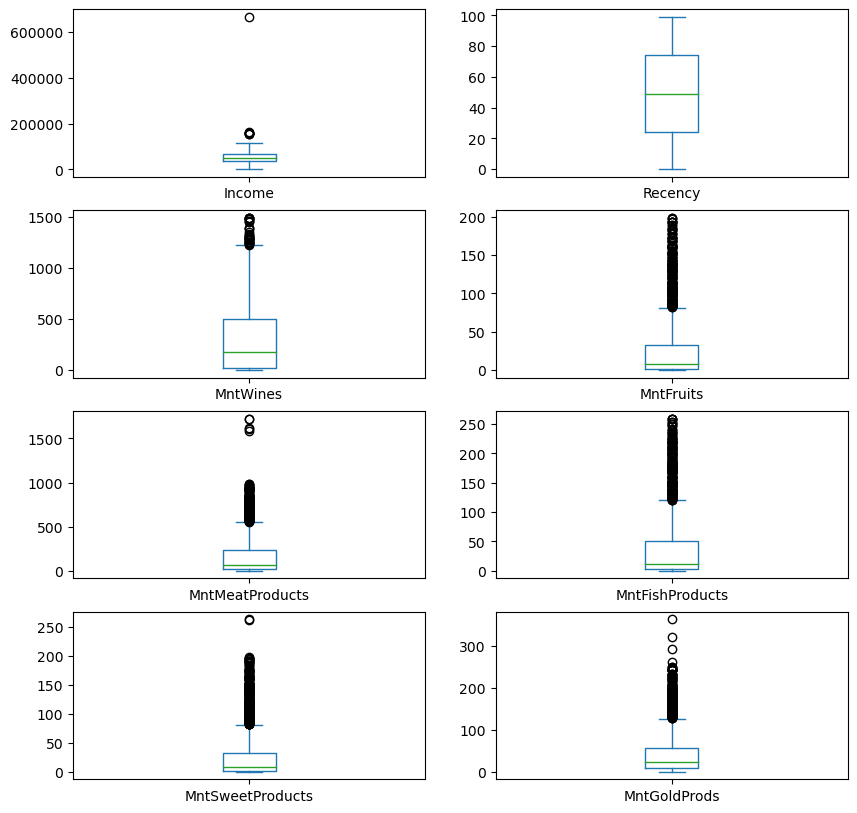

In [24]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

In [25]:
df = df.loc[df['Income'] < 100000]

df.shape

(2203, 28)

In [26]:
df = df.loc[(df['MntMeatProducts'] < 1000)]

df.shape

(2202, 28)

In [27]:
df = df.loc[(df['MntSweetProducts'] < 200)]

df.shape

(2202, 28)

In [28]:
df = df.loc[(df['MntGoldProds'] < 250)]

df.shape

(2199, 28)

## 3. Bivariate Analysis

### a. Continuous vs Continuous Numerical Data

In [29]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [31]:
df.corr()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Income,1.000000,0.006753,0.734493,0.538823,0.726718,0.554295,0.550854,0.438437
Recency,0.006753,1.000000,0.014196,-0.003562,0.026507,0.000122,0.030501,0.023032
MntWines,0.734493,0.014196,1.000000,0.385156,0.605566,0.394167,0.395094,0.400691
MntFruits,0.538823,-0.003562,0.385156,1.000000,0.579928,0.592007,0.578764,0.400677
MntMeatProducts,0.726718,0.026507,0.605566,0.579928,1.000000,0.607236,0.573704,0.396614
MntFishProducts,0.554295,0.000122,0.394167,0.592007,0.607236,1.000000,0.593281,0.435438
MntSweetProducts,0.550854,0.030501,0.395094,0.578764,0.573704,0.593281,1.000000,0.369939
MntGoldProds,0.438437,0.023032,0.400691,0.400677,0.396614,0.435438,0.369939,1.000000


<AxesSubplot:xlabel='Income', ylabel='MntWines'>

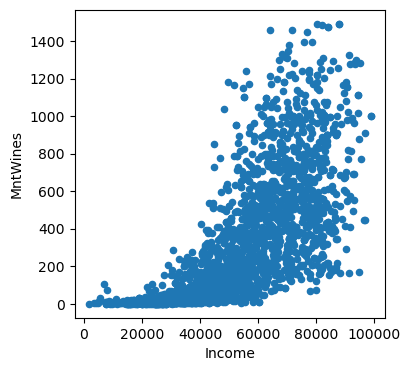

In [33]:
df.plot(kind='scatter', x='Income', y='MntWines', figsize=(4, 4))

<AxesSubplot:xlabel='Income', ylabel='MntMeatProducts'>

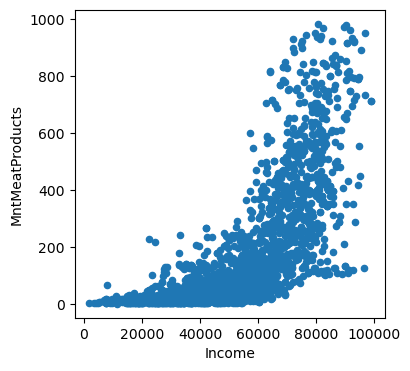

In [34]:
df.plot(kind='scatter', x='Income', y='MntMeatProducts', figsize=(4, 4))

### b. Discrete vs Discrete Data

In [35]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [36]:
pd.crosstab(df['Marital_Status'], df['Response'])

Response,0,1
Marital_Status,,
Absurd,1,1
Alone,2,1
Divorced,183,47
Married,754,98
Single,362,105
Together,509,58
Widow,58,18
YOLO,1,1


In [37]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize=True)

Response,0,1
Marital_Status,,
Absurd,0.000455,0.000455
Alone,0.000910,0.000455
Divorced,0.083220,0.021373
Married,0.342883,0.044566
Single,0.164620,0.047749
Together,0.231469,0.026376
Widow,0.026376,0.008186
YOLO,0.000455,0.000455


In [38]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='index')

Response,0,1
Marital_Status,,
Absurd,0.500000,0.500000
Alone,0.666667,0.333333
Divorced,0.795652,0.204348
Married,0.884977,0.115023
Single,0.775161,0.224839
Together,0.897707,0.102293
Widow,0.763158,0.236842
YOLO,0.500000,0.500000


In [39]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='index', margins=True)

Response,0,1
Marital_Status,,
Absurd,0.500000,0.500000
Alone,0.666667,0.333333
Divorced,0.795652,0.204348
Married,0.884977,0.115023
Single,0.775161,0.224839
Together,0.897707,0.102293
Widow,0.763158,0.236842
YOLO,0.500000,0.500000
All,0.850387,0.149613


In [40]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='columns')

Response,0,1
Marital_Status,,
Absurd,0.000535,0.003040
Alone,0.001070,0.003040
Divorced,0.097861,0.142857
Married,0.403209,0.297872
Single,0.193583,0.319149
Together,0.272193,0.176292
Widow,0.031016,0.054711
YOLO,0.000535,0.003040


In [41]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='columns', margins=True)

Response,0,1,All
Marital_Status,,,
Absurd,0.000535,0.003040,0.000910
Alone,0.001070,0.003040,0.001364
Divorced,0.097861,0.142857,0.104593
Married,0.403209,0.297872,0.387449
Single,0.193583,0.319149,0.212369
Together,0.272193,0.176292,0.257844
Widow,0.031016,0.054711,0.034561
YOLO,0.000535,0.003040,0.000910


<AxesSubplot:xlabel='Marital_Status'>

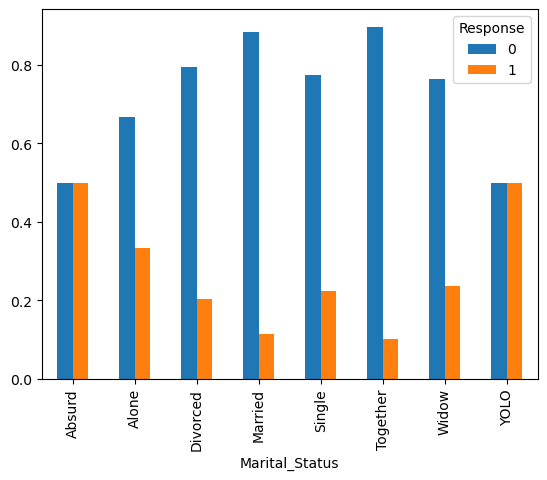

In [42]:
tab = pd.crosstab(df['Marital_Status'], df['Response'], normalize='index')

tab.plot(kind='bar')

<AxesSubplot:ylabel='Marital_Status'>

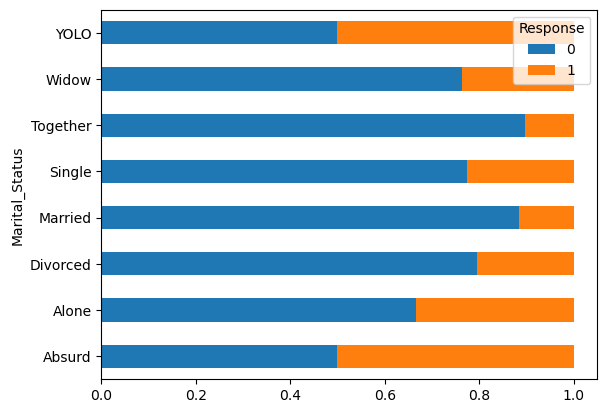

In [43]:
tab.plot(kind='barh', stacked=True)

### c. Continuous Numerical vs Discrete Data

In [44]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2199 non-null   object        
 1   Year_Birth           2199 non-null   object        
 2   Education            2199 non-null   object        
 3   Marital_Status       2199 non-null   object        
 4   Income               2199 non-null   float64       
 5   Kidhome              2199 non-null   object        
 6   Teenhome             2199 non-null   object        
 7   Dt_Customer          2199 non-null   datetime64[ns]
 8   Recency              2199 non-null   int64         
 9   MntWines             2199 non-null   int64         
 10  MntFruits            2199 non-null   int64         
 11  MntMeatProducts      2199 non-null   int64         
 12  MntFishProducts      2199 non-null   int64         
 13  MntSweetProducts     2199 non-nul

In [46]:
group = df.groupby('Marital_Status')

group['Income'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Marital_Status,,,,
Absurd,65487.0,79244.0,72365.500000,72365.5
Alone,34176.0,61331.0,43789.000000,35860.0
Divorced,1730.0,90687.0,52177.934783,52183.0
Married,4023.0,96547.0,51462.983568,51763.5
Single,3502.0,98777.0,50940.903640,48904.0
Together,5648.0,96876.0,51425.252205,51195.0
Widow,22123.0,85620.0,56481.552632,56551.0
YOLO,48432.0,48432.0,48432.000000,48432.0


<AxesSubplot:title={'center':'Income'}, xlabel='Marital_Status'>

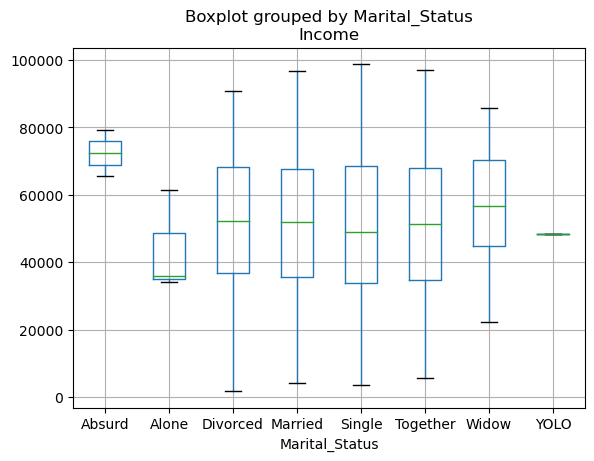

In [47]:
df.boxplot(by='Marital_Status', column='Income')